## Inspired by this [guide](http://joshvarty.github.io/AlphaZero/).

In [1]:
import sys
sys.path.insert(1, 'games/')
from connect2 import Connect2
from connect4 import Connect4
from tic_tac_toe import TicTacToe

from mcts import MCTS
from model import Model

import platform
import numpy as np
import matplotlib.pyplot as plt

if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display
np.random.seed(42)

In [2]:
model = Model((TicTacToe.ROWS, TicTacToe.COLUMNS, 2), TicTacToe.nb_actions, summary=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3, 2)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 3, 3, 10)     30          ['input_1[0][0]']                
                                                                                                  
 re_lu (ReLU)                   (None, 3, 3, 10)     0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 3, 3, 10)     110         ['re_lu[0][0]']                  
                                                                                              

2021-11-30 09:30:37.987914: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/15...

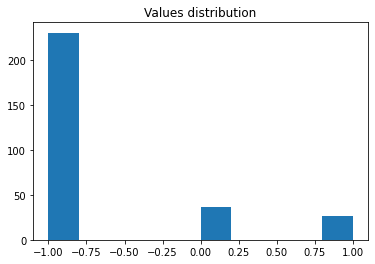

Done
policy_accuracy:  0.92 value_mse:  0.28
2/15...

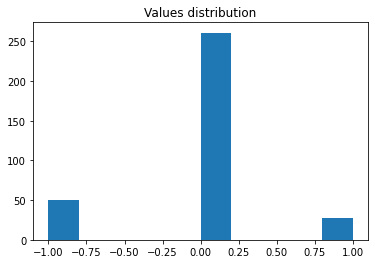

Done
policy_accuracy:  0.98 value_mse:  0.15
3/15...

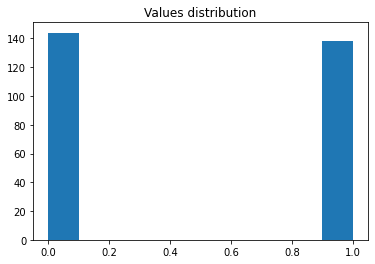

Done
policy_accuracy:  1.00 value_mse:  0.15
4/15...

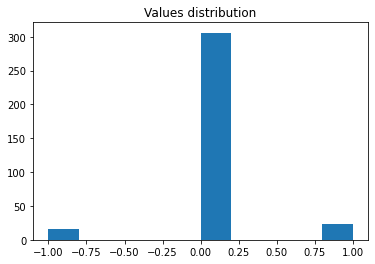

Done
policy_accuracy:  0.98 value_mse:  0.11
5/15...

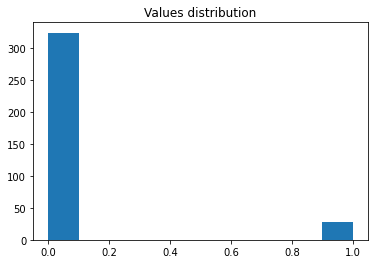

Done
policy_accuracy:  1.00 value_mse:  0.07
6/15...

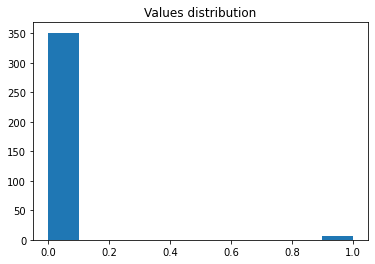

Done
policy_accuracy:  1.00 value_mse:  0.01
7/15...

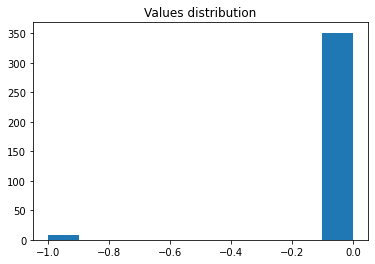

Done
policy_accuracy:  1.00 value_mse:  0.02
8/15...

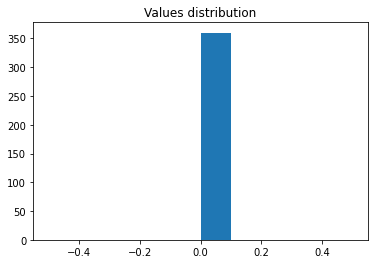

Done
policy_accuracy:  1.00 value_mse:  0.00
9/15...

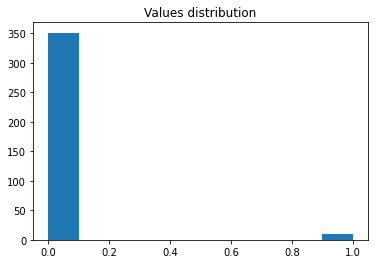

Done
policy_accuracy:  1.00 value_mse:  0.03
10/15...

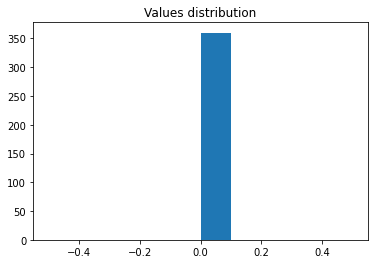

Done
policy_accuracy:  1.00 value_mse:  0.00
11/15...

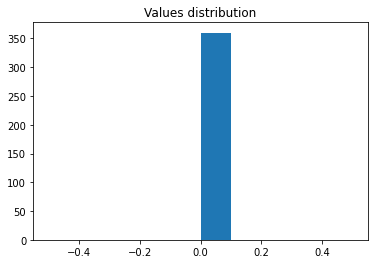

Done
policy_accuracy:  1.00 value_mse:  0.00
12/15...

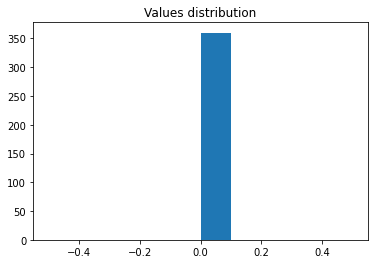

Done
policy_accuracy:  1.00 value_mse:  0.00
13/15...

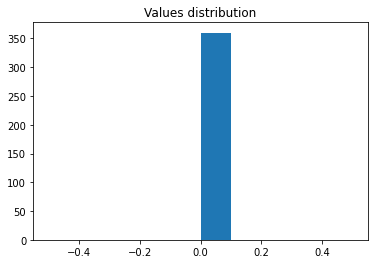

Done
policy_accuracy:  1.00 value_mse:  0.00
14/15...

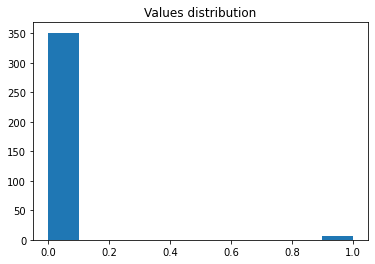

Done
policy_accuracy:  1.00 value_mse:  0.01
15/15...

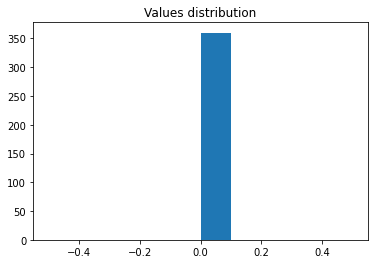

Done
policy_accuracy:  1.00 value_mse:  0.00


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [3]:
model.train(TicTacToe(), nb_iter=15, nb_simulations=200, nb_games=100, nb_epochs=40)
model.save("models/model_tic_tac_toe.h5")

In [4]:
model.predict(TicTacToe.get_init_state())

(array([4.0296321e-03, 2.6521436e-04, 7.6932214e-05, 9.9484235e-01,
        2.4348104e-05, 6.8091125e-05, 5.3390264e-05, 4.9244385e-04,
        1.4770949e-04], dtype=float32),
 -0.00055747095)

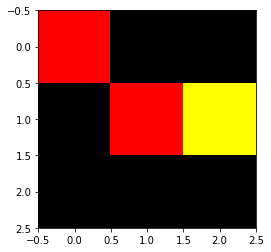

Eval: (array([2.23437880e-07, 9.97459114e-01, 1.15048015e-05, 1.62883522e-03,
       8.27054958e-09, 9.91394633e-10, 8.45258299e-04, 1.92182100e-07,
       5.48852368e-05], dtype=float32), 0.860393)


ValueError: invalid literal for int() with base 10: ''

In [16]:
state = TicTacToe.get_init_state()
state = TicTacToe().get_new_state(state, 0)
state = TicTacToe().get_new_state(state, 5)
TicTacToe.play_vs(model, state, 200)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 3, 3, 2)]    0           []                               
                                                                                                  
 conv2d_20 (Conv2D)             (None, 3, 3, 10)     30          ['input_5[0][0]']                
                                                                                                  
 re_lu_20 (ReLU)                (None, 3, 3, 10)     0           ['conv2d_20[0][0]']              
                                                                                                  
 conv2d_21 (Conv2D)             (None, 3, 3, 10)     110         ['re_lu_20[0][0]']               
                                                                                            

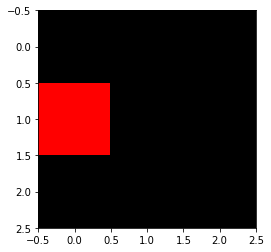

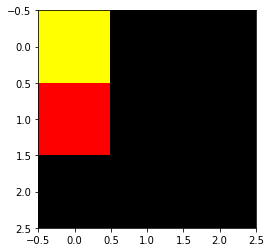

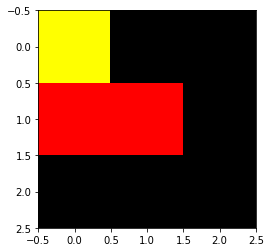

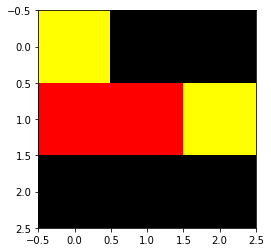

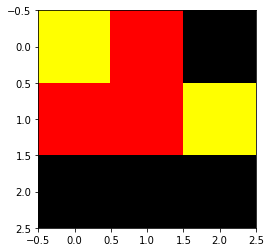

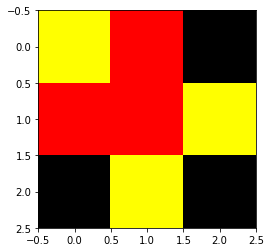

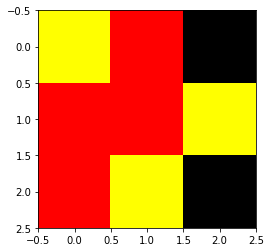

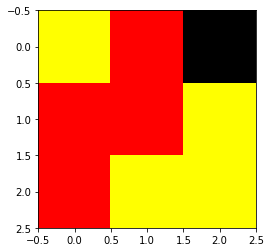

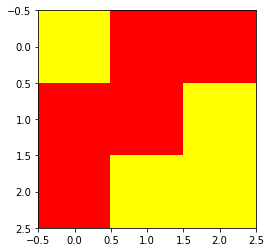

In [15]:
import time

model2 = Model((TicTacToe.ROWS, TicTacToe.COLUMNS, 2), TicTacToe.nb_actions, summary=True)
state = TicTacToe.get_init_state()
while TicTacToe().get_reward(state) is None:
  mcts1 = MCTS(TicTacToe(), state, model, 200)
  state = mcts1.run().select_child().state
  plt.imshow(TicTacToe().colorize_state(state))
  plt.show()
  time.sleep(1)
  if TicTacToe().get_reward(state) is not None:
    break
  mcts2 = MCTS(TicTacToe(), state, model2, 200)
  state = mcts2.run().select_child().state
  plt.imshow(TicTacToe().colorize_state(state))
  plt.show()
  time.sleep(1)
  if TicTacToe().get_reward(state):
    break